### Q1(a)  Generate a data set with p = 25 features, n = 1,000 observations, and an associated quantitative response vector generated according to the model: Y = Xβ + , where β has some elements that are exactly equal to zero. (be sure to use “set.seed”)

In [1]:
set.seed(37)
p = 25
n = 1000
x = matrix(rnorm(n*p),n,p)
beta <- rnorm(p)
beta[1] <- 0
beta[3] <- 0
beta[9] <- 0
beta[12] <- 0
beta[18] <- 0
eps <- rnorm(p)

y <- x%*%beta + eps

summary(x)
summary(y)

       V1                V2                 V3                 V4          
 Min.   :-2.8613   Min.   :-3.28763   Min.   :-2.75134   Min.   :-2.94995  
 1st Qu.:-0.6961   1st Qu.:-0.59550   1st Qu.:-0.65133   1st Qu.:-0.71232  
 Median :-0.0339   Median : 0.06348   Median : 0.05314   Median :-0.01484  
 Mean   :-0.0184   Mean   : 0.03492   Mean   : 0.01326   Mean   : 0.05575  
 3rd Qu.: 0.6836   3rd Qu.: 0.69935   3rd Qu.: 0.68554   3rd Qu.: 0.80890  
 Max.   : 3.8147   Max.   : 3.17901   Max.   : 3.49375   Max.   : 3.32944  
       V5                 V6                  V7                 V8          
 Min.   :-3.13860   Min.   :-3.265187   Min.   :-2.98144   Min.   :-2.75869  
 1st Qu.:-0.63080   1st Qu.:-0.646058   1st Qu.:-0.75989   1st Qu.:-0.68434  
 Median :-0.01120   Median : 0.000693   Median :-0.05697   Median :-0.02769  
 Mean   : 0.01069   Mean   : 0.007317   Mean   :-0.07226   Mean   :-0.03049  
 3rd Qu.: 0.69042   3rd Qu.: 0.700008   3rd Qu.: 0.61733   3rd Qu.: 0.59923  


       V1          
 Min.   :-18.5662  
 1st Qu.: -3.9627  
 Median : -0.3683  
 Mean   : -0.3404  
 3rd Qu.:  3.1816  
 Max.   : 15.4384  

### Q1 (b) Split your data set into a training set containing 500 observations and a test set containing 500 observations.

In [40]:
train <-  sample(seq(1000), 500, replace = FALSE)
y.train <-  y[train,]
y.test <-  y[-train,]
x.train <-  x[train,]
x.test <-  x[-train,]

summary(x.train)
summary(y.train)

       V1                 V2                 V3                 V4          
 Min.   :-2.86131   Min.   :-3.28763   Min.   :-2.67525   Min.   :-2.73733  
 1st Qu.:-0.71553   1st Qu.:-0.61463   1st Qu.:-0.66592   1st Qu.:-0.68755  
 Median :-0.13609   Median : 0.06328   Median : 0.01057   Median :-0.07037  
 Mean   :-0.07066   Mean   : 0.02894   Mean   :-0.01020   Mean   : 0.02108  
 3rd Qu.: 0.62216   3rd Qu.: 0.66320   3rd Qu.: 0.66239   3rd Qu.: 0.75855  
 Max.   : 3.25794   Max.   : 3.17901   Max.   : 3.49375   Max.   : 3.32944  
       V5                 V6                 V7                 V8          
 Min.   :-3.13860   Min.   :-2.82805   Min.   :-2.78446   Min.   :-2.75171  
 1st Qu.:-0.65598   1st Qu.:-0.60063   1st Qu.:-0.81858   1st Qu.:-0.63365  
 Median :-0.01505   Median : 0.07399   Median :-0.07508   Median :-0.01256  
 Mean   : 0.00122   Mean   : 0.02932   Mean   :-0.09455   Mean   : 0.01666  
 3rd Qu.: 0.67029   3rd Qu.: 0.67616   3rd Qu.: 0.62782   3rd Qu.: 0.64535  

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-18.5662  -3.9886  -0.3732  -0.3185   3.3447  15.4384 

### Q1 (c) Perform subset selection (best, forward or backwards) on the training set, and plot the training and test MSE associated with the best model of each size.

Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

Plot the test set MSE associated with the best model of each size.

In [25]:
library(leaps)
library(ggplot2)
library(caret)

Loading required package: lattice



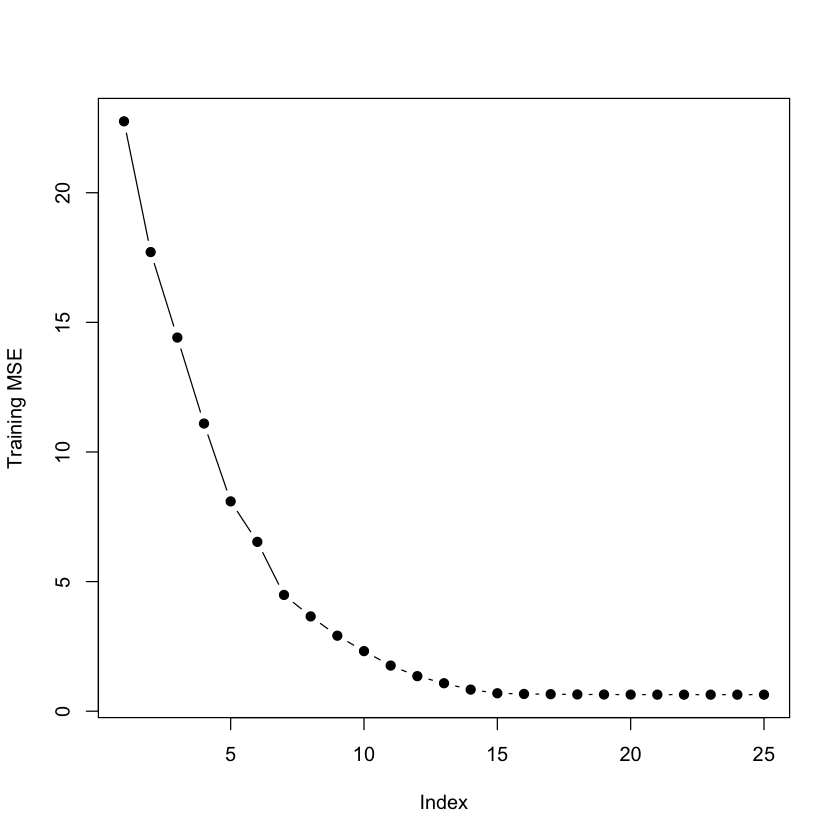

In [5]:
library(leaps)
regfit.full <-  regsubsets(y ~ . , 
                           data = data.frame(x = x.train, y = y.train), 
                           nvmax = p)
val.errors <-  rep(NA, p)
x_cols <-  colnames(x, do.NULL=FALSE, prefix="x.")

for (i in 1:p) {
  coefi <-  coef(regfit.full, id = i)
  pred <-  as.matrix(x.train[, x_cols %in% names(coefi)]) %*% 
    coefi[names(coefi) %in% x_cols]
  val.errors[i] <-  mean((y.train - pred)^2)
}

plot(val.errors, ylab = "Training MSE", pch = 19, type = "b")

In [7]:
which.min(val.errors)

[1] 22

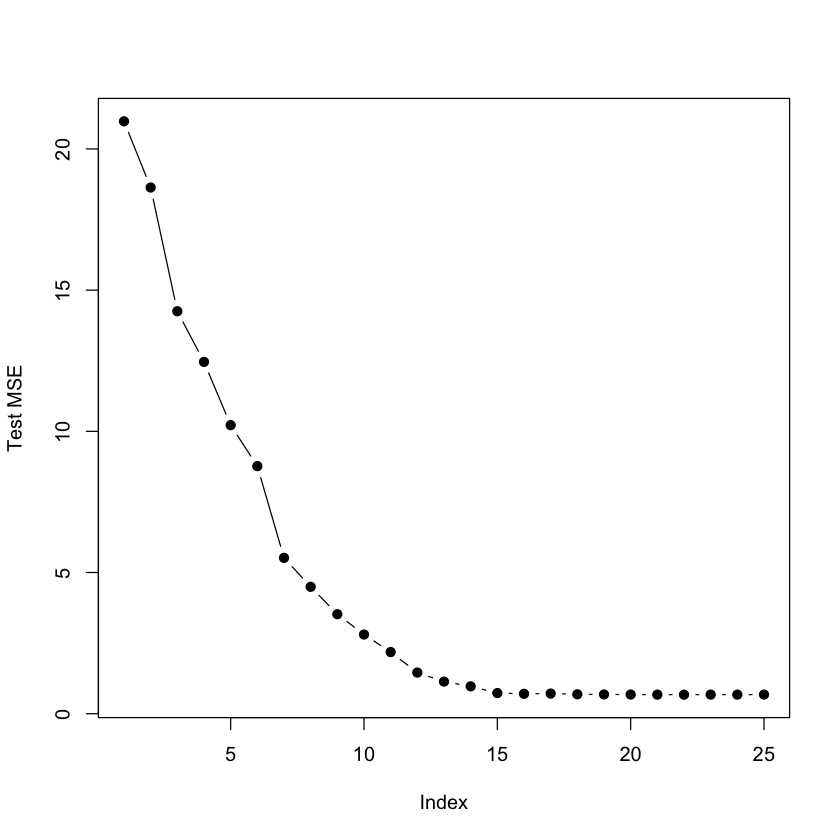

In [14]:
val.errors.test <-  rep(NA, p)
for (i in 1:p) {
  coefi <-  coef(regfit.full, id = i)
  pred <-  as.matrix(x.test[, x_cols %in% names(coefi)]) %*% 
    coefi[names(coefi) %in% x_cols]
  val.errors.test[i] <-  mean((y.test - pred)^2)
}
plot(val.errors.test, ylab = "Test MSE", pch = 19, type = "b")

### Q1(d) For which model size does the test set MSE take on its minimum value? Comment on your results.

In [15]:
which.min(val.errors.test)

[1] 22

The MSE is the lowest for 22

The model with 22 variables results in a model with a minimum test set MSE.

### Q1(e)  How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.

In [22]:
coef(regfit.full, which.min(val.errors.test))

(Intercept)         x.1         x.3         x.4         x.5         x.6 
-0.20929180 -0.01742093 -0.03692712  1.50015765  1.57587126 -0.90007961 
        x.7         x.8         x.9        x.10        x.11        x.13 
 0.09631430  0.78412742  0.05163006  1.64185132 -0.75460908  2.14755604 
       x.14        x.15        x.16        x.17        x.19        x.20 
-2.40574971  0.87713926  1.81341807  0.48591648 -0.56046984  1.39773301 
       x.21        x.22        x.23        x.24        x.25 
 0.68372452  0.10397191 -0.17041902 -0.37256539  0.04546209

The best model caught all zeroed out coefficients.

### Q1(f)  Create a plot containing p m=1(βj − ˆβmj)2 for a range of values i, where ˆβm j is the jth coefficient estimate for the best model containing m coefficient estimates. Comment on what you observe

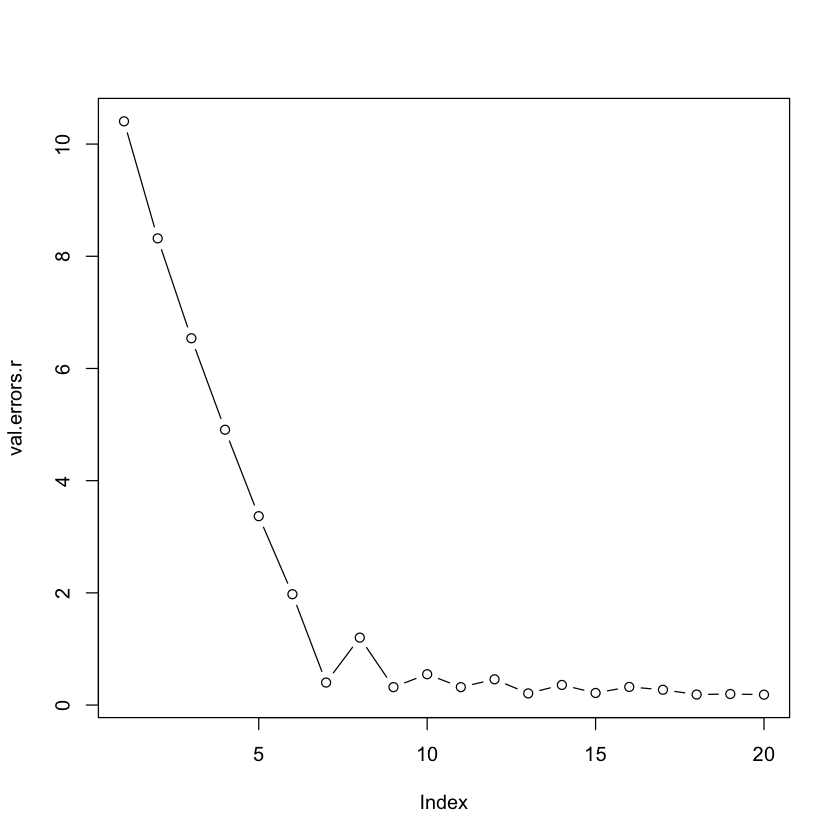

In [34]:
val.errors.r=rep(NA,20)
x.columns <- colnames(x, do.NULL = FALSE, prefix="x.")
for(i in 1:20){
 coefi=coef(regfit.full,id=i)
 val.errors.r[i]=sqrt(sum((beta[x.columns %in% names(coefi)] - coefi[names(coefi) %in% x.columns])^2) + sum(beta[!(x.columns %in% names(coefi))])^2)
}
plot(val.errors.r, type='b')

In [39]:
which.min(val.errors.r)

[1] 20

The model with the lowest test MSE is different from the model with the estimated coefficients closest to the true coefficients, which means that the lower test MSE doesn't necessarily mean that the coefficients are a closer fit.

## Q2 -  Consider the Diabetes dataset

### Q2 (a) Produce pairwise scatterplots for all five variables, with different symbols or colors representing the three different classes. Do you see any evidence that the classes may have difference covariance matrices? That they may not be multivariate normal?

In [73]:
library("MASS")
library("klaR")

In [42]:
setwd("~/Desktop/SDM/Assignment - 3")

In [43]:
load("Diabetes.RData")
diab <- Diabetes
dim(diab)
head(diab)

[1] 145   6

,relwt,glufast,glutest,instest,sspg,group
,<dbl>,<int>,<int>,<int>,<int>,<fct>
1,0.81,80,356,124,55,Normal
2,0.95,97,289,117,76,Normal
3,0.94,105,319,143,105,Normal
4,1.04,90,356,199,108,Normal
5,1.00,90,323,240,143,Normal
6,0.76,86,381,157,165,Normal


In [9]:
names(diab)
str(diab)

[1] "relwt"   "glufast" "glutest" "instest" "sspg"    "group"

'data.frame':	145 obs. of  6 variables:
 $ relwt  : num  0.81 0.95 0.94 1.04 1 0.76 0.91 1.1 0.99 0.78 ...
 $ glufast: int  80 97 105 90 90 86 100 85 97 97 ...
 $ glutest: int  356 289 319 356 323 381 350 301 379 296 ...
 $ instest: int  124 117 143 199 240 157 221 186 142 131 ...
 $ sspg   : int  55 76 105 108 143 165 119 105 98 94 ...
 $ group  : Factor w/ 3 levels "Normal","Chemical_Diabetic",..: 1 1 1 1 1 1 1 1 1 1 ...


## 2(a)

plotting the scatter plots will all five variables with different classes

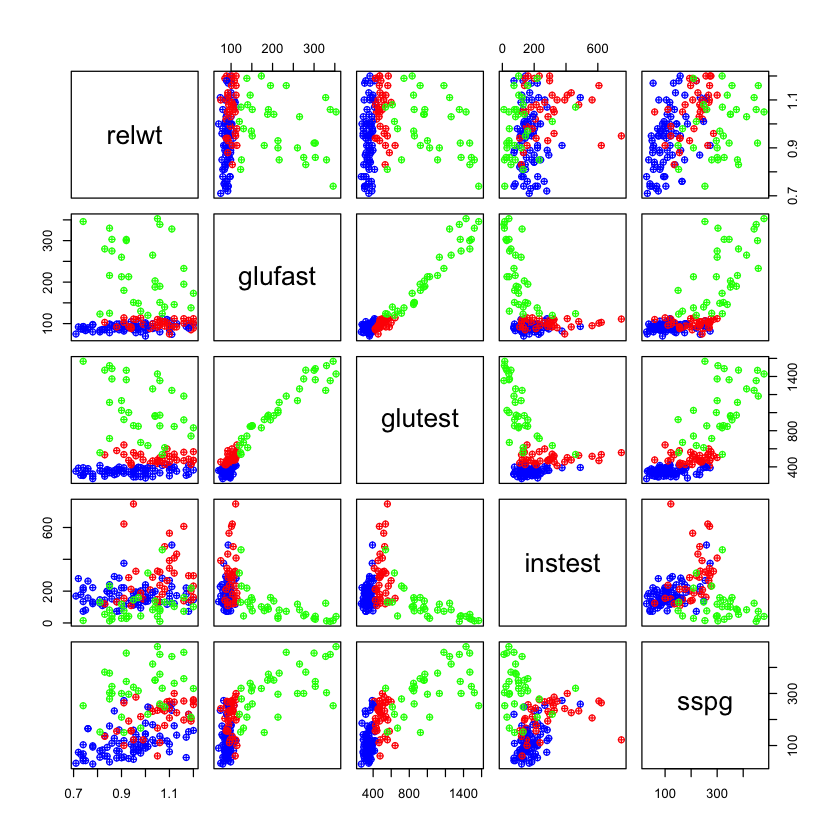

In [46]:
cols <- c("Blue", "Red", "Green")
pairs(diab[,1:5], pch = 10, cex = 1, col = cols[diab$group])

In [47]:
cov(diab[,1:5])

,relwt,glufast,glutest,instest,sspg
relwt,0.01670174,-7.281513e-02,9.824262e-01,3.473373,5.266255
glufast,-0.07281513,4.087097e+03,1.954606e+04,-3063.463649,4849.905651
glutest,0.98242625,1.954606e+04,1.004578e+05,-12918.162739,25908.490182
instest,3.47337308,-3.063464e+03,-1.291816e+04,14625.312548,101.482519
sspg,5.26625479,4.849906e+03,2.590849e+04,101.482519,11242.331897


plotting the pair plot with covariance

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


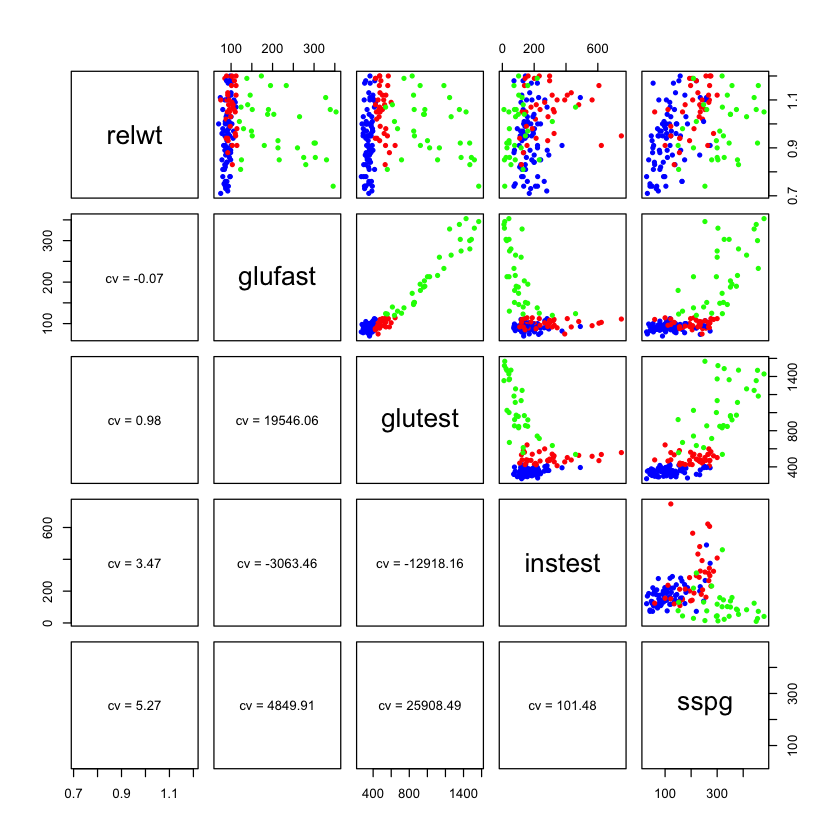

In [54]:
# covariance panel
panel.cov <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- round(cov(x, y), digits=2)
    txt <- paste0("cv = ", r)
    text(0.5, 0.5, txt)
}

# Customize upper panel
upper.panel<-function(x, y){
  points(x,y, pch = 20, col = cols[diab$group])
}
# Create the plots
pairs(diab[,1:5], 
      lower.panel = panel.cov,
      upper.panel = upper.panel)

## 2(b)

In [55]:
cor(diab[,1:5])

,relwt,glufast,glutest,instest,sspg
relwt,1.000000000,-0.008813193,0.0239843,0.222237813,0.384319804
glufast,-0.008813193,1.000000000,0.9646281,-0.396234858,0.715480192
glutest,0.023984304,0.964628091,1.0000000,-0.337020435,0.770942459
instest,0.222237813,-0.396234858,-0.3370204,1.000000000,0.007914263
sspg,0.384319804,0.715480192,0.7709425,0.007914263,1.000000000


In [56]:
set.seed(37)
indi <- sample(1:nrow(diab), round(2/3*nrow(diab)), replace = FALSE)
train <- diab[indi,]
test <- diab[-indi,]
dim(train)
head(train)
dim(test)
head(test)

[1] 97  6

,relwt,glufast,glutest,instest,sspg,group
,<dbl>,<int>,<int>,<int>,<int>,<fct>
47,0.95,85,334,118,122,Normal
24,0.97,90,327,192,124,Normal
50,0.87,87,360,292,128,Normal
3,0.94,105,319,143,105,Normal
109,1.16,112,562,139,198,Chemical_Diabetic
36,0.88,99,376,134,80,Normal


[1] 48  6

,relwt,glufast,glutest,instest,sspg,group
,<dbl>,<int>,<int>,<int>,<int>,<fct>
2,0.95,97,289,117,76,Normal
5,1.00,90,323,240,143,Normal
9,0.99,97,379,142,98,Normal
14,0.84,90,371,200,93,Normal
15,0.74,86,312,208,68,Normal
16,0.98,80,393,202,102,Normal


## 2(b)

In [57]:
#fitting a lda model
lda.fit <- lda(group~., data = train)
lda.fit

Call:
lda(group ~ ., data = train)

Prior probabilities of groups:
           Normal Chemical_Diabetic    Overt_Diabetic 
        0.4948454         0.2268041         0.2783505 

Group means:
                      relwt   glufast   glutest   instest     sspg
Normal            0.9275000  92.56250  351.7917 172.93750 123.5000
Chemical_Diabetic 1.0736364  98.95455  489.6364 280.31818 224.7727
Overt_Diabetic    0.9881481 225.96296 1066.3704  98.51852 334.4074

Coefficients of linear discriminants:
                  LD1          LD2
relwt    0.7856142766 -5.171480267
glufast -0.0325359527  0.035876084
glutest  0.0113584521 -0.008095783
instest -0.0006356378 -0.006846434
sspg     0.0062894040  0.004111934

Proportion of trace:
   LD1    LD2 
0.8745 0.1255 

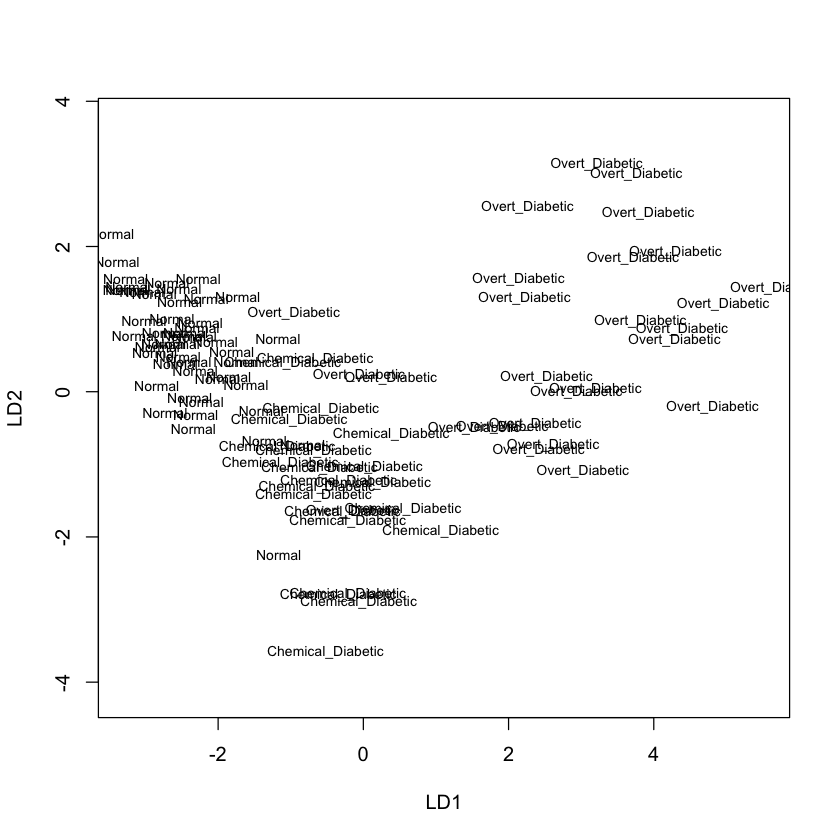

In [58]:
plot(lda.fit)

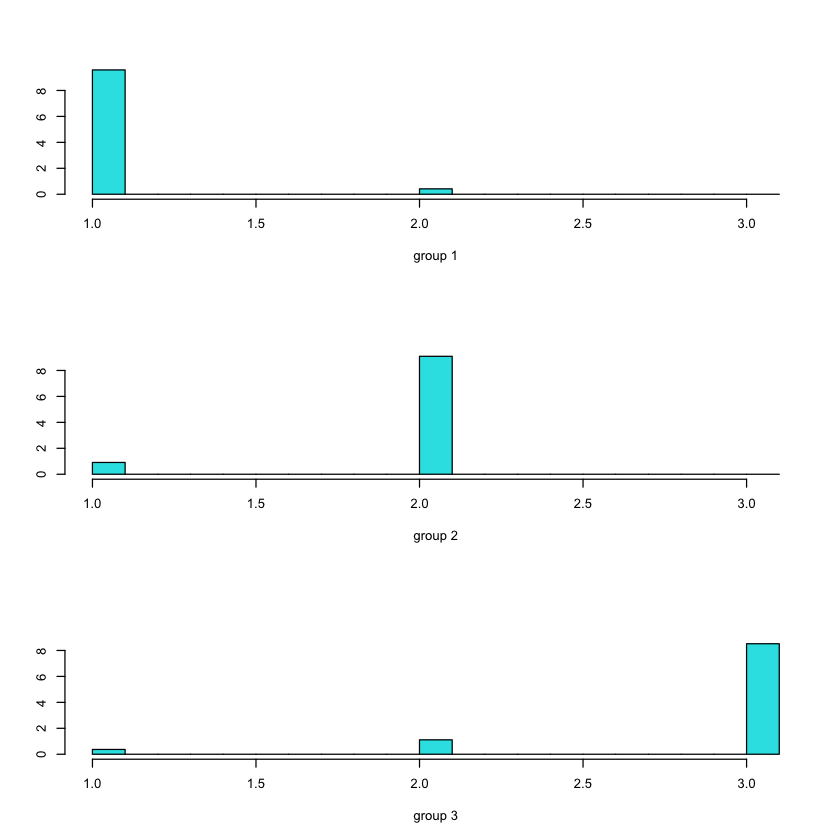

In [59]:
#predicting the train data with lda model
train.predic <- predict(lda.fit, newdata = train)
ldahist(data = as.numeric(train.predic$class), g = as.numeric(train$group))

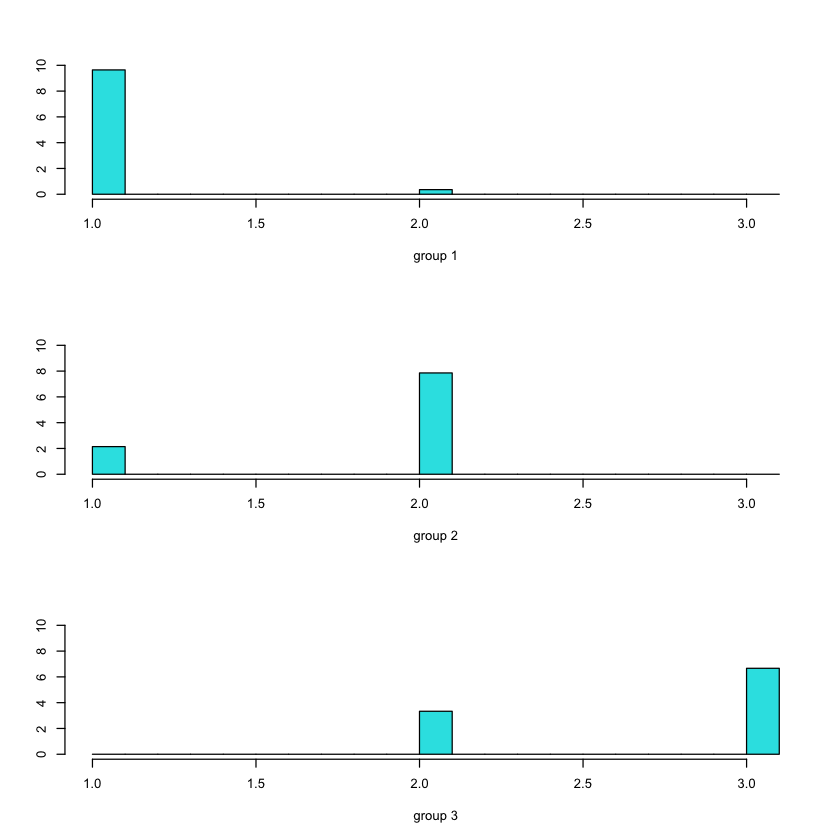

In [61]:
#predicting the test data with lda model
test.predic <- predict(lda.fit, newdata = test)
ldahist(data = as.numeric(test.predic$class), g = as.numeric(test$group))

In [62]:
#computing the train error and test error
train_error <- (1/length(train$group))*length(which(train$group != train.predic$class))
test_error <- (1/length(test$group))*length(which(test$group != test.predic$class))
train_error
test_error

[1] 0.08247423

[1] 0.125

In [63]:
#fitting the qda model
qda.fit <- qda(group~., data = train)
qda.fit

Call:
qda(group ~ ., data = train)

Prior probabilities of groups:
           Normal Chemical_Diabetic    Overt_Diabetic 
        0.4948454         0.2268041         0.2783505 

Group means:
                      relwt   glufast   glutest   instest     sspg
Normal            0.9275000  92.56250  351.7917 172.93750 123.5000
Chemical_Diabetic 1.0736364  98.95455  489.6364 280.31818 224.7727
Overt_Diabetic    0.9881481 225.96296 1066.3704  98.51852 334.4074

In [64]:
#predicting the train data with qda model
train.predic <- predict(qda.fit, newdata = train)
head(train.predic)

,Normal,Chemical_Diabetic,Overt_Diabetic
47,9.984506e-01,1.494609e-03,5.478570e-05
24,9.996969e-01,2.206869e-04,8.242344e-05
50,9.969512e-01,2.699975e-03,3.488310e-04
3,9.999739e-01,8.468662e-08,2.599994e-05
109,7.511126e-06,9.695428e-01,3.044972e-02
36,9.999633e-01,1.264163e-05,2.409054e-05
41,9.997875e-01,1.084347e-04,1.040574e-04
127,6.485043e-172,7.575550e-101,1.000000e+00
17,9.999492e-01,3.309826e-05,1.769533e-05
83,3.335318e-02,9.595446e-01,7.102218e-03


In [65]:
#predicting the test data with qda model
test.predic <- predict(qda.fit, newdata = test)
head(test.predic)

,Normal,Chemical_Diabetic,Overt_Diabetic
2,9.999954e-01,5.438503e-08,4.507783e-06
5,9.988833e-01,8.297955e-04,2.869140e-04
9,9.997757e-01,1.715603e-04,5.277921e-05
14,9.997176e-01,2.139002e-04,6.849686e-05
15,9.999962e-01,4.777944e-07,3.294596e-06
16,9.484866e-01,4.308243e-02,8.430962e-03
21,9.999521e-01,1.211052e-05,3.574944e-05
23,9.999530e-01,1.409868e-05,3.289367e-05
26,2.359128e-01,1.793722e-01,5.847149e-01
27,9.951764e-01,4.763611e-03,5.993858e-05


In [66]:
#computing the train error and test error
train_error <- (1/length(train$group))*length(which(train$group != train.predic$class))
test_error <- (1/length(test$group))*length(which(test$group != test.predic$class))
train_error
test_error

[1] 0.03092784

[1] 0.125

From the above results error in train and test for lda and qda, It is visible that LDA performs well than QDA in our case.

## 2(c)

In [67]:
relwt <- 1.86 
glufast <- 184 
glutest <- 68 
instest <- 122 
sspg <- 544 

df2 <- data.frame(relwt, glufast, glutest, instest, sspg)
df2

relwt,glufast,glutest,instest,sspg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.86,184,68,122,544


In [69]:
#predicting the class using LDA
predict(lda.fit, newdata = df2)$class

[1] Normal
Levels: Normal Chemical_Diabetic Overt_Diabetic

In [70]:
#predicting the class using QDA
predict(qda.fit, newdata = df2)$class

[1] Overt_Diabetic
Levels: Normal Chemical_Diabetic Overt_Diabetic

For the given variables, following are the classes assigned by each models: LDA : Normal QDA : Overt_Diabetic



## 2(d)

In [74]:
rda.fit <- rda(group ~., data = train, regularization = c(gamma = 0, lambda = 0.5))
rda.fit

Call: 
rda(formula = group ~ ., data = train, regularization = c(gamma = 0, 
    lambda = 0.5))

Regularization parameters: 
 gamma lambda 
   0.0    0.5 

Prior probabilities of groups: 
           Normal Chemical_Diabetic    Overt_Diabetic 
        0.4948454         0.2268041         0.2783505 

Misclassification rate: 
       apparent: 6.186 %

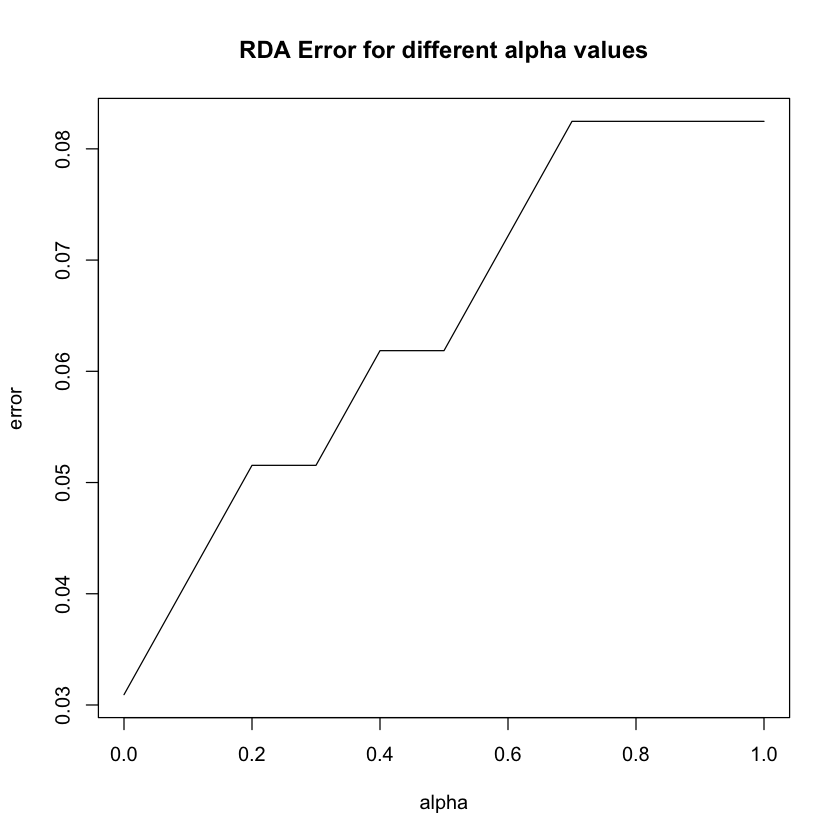

In [76]:
#applying the rda for different alpha values
alpha <- seq(from = 0, to = 1, by = .1)
error_rate_train.rda <- c()
error_rate_test.rda <- c()

for (i in seq(1,length(alpha))){
    rda.fit <- rda(group ~., data = train, regularization = c(gamma = 0, lambda = alpha[i]))
    #print(i)
    y_hat_train <- predict(rda.fit, newdata = train)$class 
    y_hat_test <- predict(rda.fit, newdata = test)$class 
    train_error <- (1/length(y_hat_train))*(length(which(y_hat_train != train$group)))
    test_error <- (1/length(y_hat_test))*(length(which(y_hat_test != test$group)))
    error_rate_train.rda <- c(error_rate_train.rda, train_error)
    error_rate_test.rda <- c(error_rate_test.rda, test_error)
}

plot(alpha, error_rate_train.rda, type= 'l', col = 'black', xlab = "alpha", ylab = "error", main = "RDA Error for different alpha values")
lines(alpha, error_rate_test.rda, col = 'blue')

The optimal value of alpha is 0.2

## Q3. This problem concerns the Boston data set

### Q3(a)  Fit classification models in order to predict whether a given census tract has a high or low crime rates. Explore logistic regression, LDA, QDA and KNN models using various subsets of the predictors. Describe your findings.

In [1]:
library("ISLR2")
library('MASS', warn.conflicts = FALSE)
library("caret")

Loading required package: ggplot2

Loading required package: lattice



In [2]:
help(Boston)
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [79]:
#copying the data into a data frame
bost <- data.frame(Boston)

In [80]:
#creating response variable
bost$resp <- "Low"
bost$resp[bost$crim > median(bost$crim)] <- "High"
bost$resp <-factor(bost$resp)
table(bost$resp)


High  Low 
 253  253 

In [81]:
#dropping the old crim variable
bost <- bost[-c(1)]

In [83]:
#creating training and test data sets
dat <- createDataPartition(y = bost$resp, p = 0.8, list = FALSE)

train <- bost[dat,]
test <- bost[-dat,]

dim(train)
head(train)
dim(test)
head(test)


[1] 406  14

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,resp
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,Low
3,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,Low
4,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,Low
6,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,Low
7,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,Low
8,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,Low


[1] 100  14

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,resp
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,Low
5,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,Low
14,0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4,High
26,0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51,13.9,High
34,0,8.14,0,0.538,5.701,95.0,3.7872,4,307,21.0,358.77,18.35,13.1,High
37,0,5.96,0,0.499,5.841,61.4,3.3779,5,279,19.2,377.56,11.41,20.0,Low


In [84]:
nzv <- nearZeroVar(train, saveMetrics = TRUE)
nzv

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
zn,15.736842,5.9113300,FALSE,FALSE
indus,4.120000,17.9802956,FALSE,FALSE
chas,15.916667,0.4926108,FALSE,FALSE
nox,1.266667,19.7044335,FALSE,FALSE
rm,1.000000,89.4088670,FALSE,FALSE
age,9.500000,72.4137931,FALSE,FALSE
dis,1.000000,84.7290640,FALSE,FALSE
rad,1.095745,2.2167488,FALSE,FALSE
tax,3.029412,15.7635468,FALSE,FALSE


In [85]:
Cor <- cor(train[,-14])
Cor

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
zn,1.00000000,-0.52470514,-0.043176211,-0.5099399,0.27172579,-0.5607477,0.6599211,-0.304694204,-0.310659742,-0.3839829,0.1726026,-0.38418296,0.3356096
indus,-0.52470514,1.00000000,0.084627753,0.7600780,-0.36688484,0.6405641,-0.7085538,0.587297311,0.712468415,0.3731016,-0.3510650,0.58762293,-0.4656582
chas,-0.04317621,0.08462775,1.000000000,0.1255524,0.09891444,0.0950774,-0.1017982,0.005705777,-0.008859047,-0.1044537,0.0413698,-0.03125826,0.1561697
nox,-0.50993989,0.76007801,0.125552393,1.0000000,-0.27567216,0.7292416,-0.7682680,0.594159192,0.649629023,0.1520041,-0.3809512,0.57285581,-0.4064150
rm,0.27172579,-0.36688484,0.098914436,-0.2756722,1.00000000,-0.1953879,0.1648603,-0.196502640,-0.278141191,-0.3305860,0.1112861,-0.60550913,0.6810423
age,-0.56074775,0.64056407,0.095077399,0.7292416,-0.19538795,1.0000000,-0.7384248,0.460009789,0.509318128,0.2503297,-0.2779786,0.58075255,-0.3411350
dis,0.65992105,-0.70855383,-0.101798154,-0.7682680,0.16486026,-0.7384248,1.0000000,-0.488222337,-0.527335442,-0.2179562,0.2905971,-0.46891774,0.2129353
rad,-0.30469420,0.58729731,0.005705777,0.5941592,-0.19650264,0.4600098,-0.4882223,1.000000000,0.908371944,0.4543576,-0.4504536,0.47389894,-0.3655698
tax,-0.31065974,0.71246841,-0.008859047,0.6496290,-0.27814119,0.5093181,-0.5273354,0.908371944,1.000000000,0.4540079,-0.4426448,0.52348129,-0.4591535
ptratio,-0.38398294,0.37310162,-0.104453730,0.1520041,-0.33058596,0.2503297,-0.2179562,0.454357640,0.454007919,1.0000000,-0.1824170,0.34494297,-0.4948657


In [87]:
highCor <- findCorrelation(Cor, cutoff = 0.75)
highCor

[1] 2 4 9

No variables are near zero variance. However, we see that industrial area and NOx are highly correlated with each other (and other variables), property tax is also highly correlated with other variables. For now we will remove the property tax variable and NOx.

In [88]:
train_cor <- train[,-c(2,9)]
test_cor <- test[,-c(2,9)]

head(train_cor)
head(test_cor)

,zn,chas,nox,rm,age,dis,rad,ptratio,black,lstat,medv,resp
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,0.0,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6,Low
3,0.0,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7,Low
4,0.0,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4,Low
6,0.0,0,0.458,6.430,58.7,6.0622,3,18.7,394.12,5.21,28.7,Low
7,12.5,0,0.524,6.012,66.6,5.5605,5,15.2,395.60,12.43,22.9,Low
8,12.5,0,0.524,6.172,96.1,5.9505,5,15.2,396.90,19.15,27.1,Low


,zn,chas,nox,rm,age,dis,rad,ptratio,black,lstat,medv,resp
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0,Low
5,0,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2,Low
14,0,0,0.538,5.949,61.8,4.7075,4,21.0,396.90,8.26,20.4,High
26,0,0,0.538,5.599,85.7,4.4546,4,21.0,303.42,16.51,13.9,High
34,0,0,0.538,5.701,95.0,3.7872,4,21.0,358.77,18.35,13.1,High
37,0,0,0.499,5.841,61.4,3.3779,5,19.2,377.56,11.41,20.0,Low


In [89]:
#Applying logistic regression 
logistic <- train(resp~., data=train, 
               method='glm', family=binomial(link='logit'),
               preProcess=c('scale', 'center'))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [90]:
summary(logistic)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3477  -0.0026   0.0004   0.1568   2.0920  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.5901     0.7677  -3.374 0.000741 ***
zn            1.7285     0.9148   1.889 0.058826 .  
indus         0.4111     0.3315   1.240 0.214993    
chas         -0.1709     0.2272  -0.752 0.452007    
nox          -5.5120     0.9638  -5.719 1.07e-08 ***
rm            0.3575     0.5491   0.651 0.515060    
age          -0.6332     0.3835  -1.651 0.098735 .  
dis          -1.1595     0.5176  -2.240 0.025082 *  
rad          -5.8569     1.4959  -3.915 9.03e-05 ***
tax           1.3282     0.5396   2.461 0.013837 *  
ptratio      -0.6914     0.2906  -2.380 0.017334 *  
black         1.0091     0.5779   1.746 0.080773 .  
lstat        -0.2240     0.3842  -0.583 0.559935    
medv         -1.2674     0.6687  -1.895 0.058046 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

In [91]:
confusionMatrix(predict(logistic, test[,-14]), test$resp)

Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   45   4
      Low     5  46
                                        
               Accuracy : 0.91          
                 95% CI : (0.836, 0.958)
    No Information Rate : 0.5           
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.82          
                                        
 Mcnemar's Test P-Value : 1             
                                        
            Sensitivity : 0.9000        
            Specificity : 0.9200        
         Pos Pred Value : 0.9184        
         Neg Pred Value : 0.9020        
             Prevalence : 0.5000        
         Detection Rate : 0.4500        
   Detection Prevalence : 0.4900        
      Balanced Accuracy : 0.9100        
                                        
       'Positive' Class : High          
                                        

Most of these variables are actually not significant in the model, we might as well remove the non-significant ones.

In [92]:
logistic <- train(resp ~ rad + nox,
               data=train, 
               method='glm', family=binomial(link='logit'),
               preProcess=c('scale', 'center'))
summary(logistic)


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.55286  -0.01416   0.02804   0.34138   1.96442  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.5790     0.5628  -4.582 4.60e-06 ***
rad          -4.3176     0.9474  -4.557 5.18e-06 ***
nox          -3.3213     0.4225  -7.861 3.81e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 562.84  on 405  degrees of freedom
Residual deviance: 213.10  on 403  degrees of freedom
AIC: 219.1

Number of Fisher Scoring iterations: 8


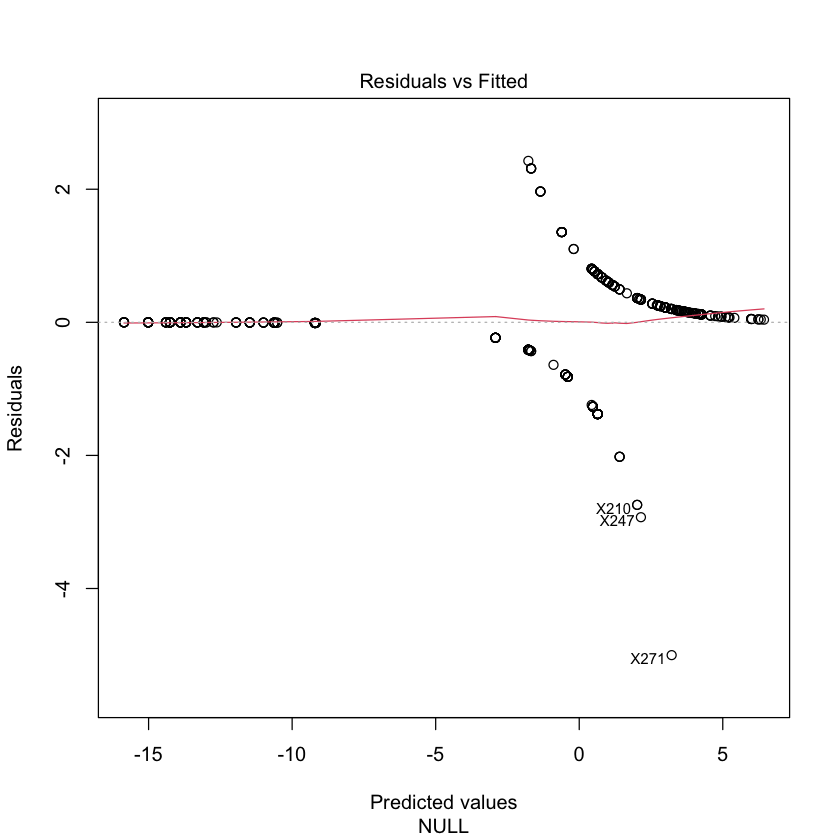

In [93]:
plot(logistic$finalModel, which=1)

In [94]:
confusionMatrix(predict(logistic, test[,-14]), test$resp)

Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   42   5
      Low     8  45
                                         
               Accuracy : 0.87           
                 95% CI : (0.788, 0.9289)
    No Information Rate : 0.5            
    P-Value [Acc > NIR] : 6.565e-15      
                                         
                  Kappa : 0.74           
                                         
 Mcnemar's Test P-Value : 0.5791         
                                         
            Sensitivity : 0.8400         
            Specificity : 0.9000         
         Pos Pred Value : 0.8936         
         Neg Pred Value : 0.8491         
             Prevalence : 0.5000         
         Detection Rate : 0.4200         
   Detection Prevalence : 0.4700         
      Balanced Accuracy : 0.8700         
                                         
       'Positive' Class : High           
                                         

In [95]:
#applying LDA
lda <- train(resp~., data=train_cor,
             method='lda', 
             preProcess=c('scale', 'center'))
lda

Linear Discriminant Analysis 

406 samples
 11 predictor
  2 classes: 'High', 'Low' 

Pre-processing: scaled (11), centered (11) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 406, 406, 406, 406, 406, 406, ... 
Resampling results:

  Accuracy  Kappa    
  0.850529  0.7004603


In [96]:
confusionMatrix(test_cor$resp, predict(lda, test_cor[,-12]))

Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   39  11
      Low     2  48
                                         
               Accuracy : 0.87           
                 95% CI : (0.788, 0.9289)
    No Information Rate : 0.59           
    P-Value [Acc > NIR] : 9.625e-10      
                                         
                  Kappa : 0.74           
                                         
 Mcnemar's Test P-Value : 0.0265         
                                         
            Sensitivity : 0.9512         
            Specificity : 0.8136         
         Pos Pred Value : 0.7800         
         Neg Pred Value : 0.9600         
             Prevalence : 0.4100         
         Detection Rate : 0.3900         
   Detection Prevalence : 0.5000         
      Balanced Accuracy : 0.8824         
                                         
       'Positive' Class : High           
                                         

In [97]:
#Applying QDA
qda <- train(resp~., data=train_cor,
             method='qda', 
             preProcess=c('scale', 'center'))
qda

Quadratic Discriminant Analysis 

406 samples
 11 predictor
  2 classes: 'High', 'Low' 

Pre-processing: scaled (11), centered (11) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 406, 406, 406, 406, 406, 406, ... 
Resampling results:

  Accuracy   Kappa    
  0.8579791  0.7159838


In [98]:
confusionMatrix(test_cor$resp, predict(qda, test_cor[,-12]))

Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   40  10
      Low     5  45
                                          
               Accuracy : 0.85            
                 95% CI : (0.7647, 0.9135)
    No Information Rate : 0.55            
    P-Value [Acc > NIR] : 1.716e-10       
                                          
                  Kappa : 0.7             
                                          
 Mcnemar's Test P-Value : 0.3017          
                                          
            Sensitivity : 0.8889          
            Specificity : 0.8182          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.9000          
             Prevalence : 0.4500          
         Detection Rate : 0.4000          
   Detection Prevalence : 0.5000          
      Balanced Accuracy : 0.8535          
                                          
       'Positive' Class : High            
                           

The resuls are slightly lower than LDA and logistic regression

In [99]:
#Applying KNN 
knnGrid <- expand.grid(.k=c(2))
# Use k = 2, since we expect 2 classes
KNN <- train(x=train_cor[,-12], method='knn',
             y=train_cor$resp, 
             preProcess=c('center', 'scale'), 
             tuneGrid = knnGrid)
KNN

k-Nearest Neighbors 

406 samples
 11 predictor
  2 classes: 'High', 'Low' 

Pre-processing: centered (11), scaled (11) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 406, 406, 406, 406, 406, 406, ... 
Resampling results:

  Accuracy   Kappa    
  0.8750781  0.7494019

Tuning parameter 'k' was held constant at a value of 2

In [100]:
confusionMatrix(predict(KNN, test_cor[,-12]), test_cor$resp)

Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   44   6
      Low     6  44
                                          
               Accuracy : 0.88            
                 95% CI : (0.7998, 0.9364)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 9.557e-16       
                                          
                  Kappa : 0.76            
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.88            
            Specificity : 0.88            
         Pos Pred Value : 0.88            
         Neg Pred Value : 0.88            
             Prevalence : 0.50            
         Detection Rate : 0.44            
   Detection Prevalence : 0.50            
      Balanced Accuracy : 0.88            
                                          
       'Positive' Class : High            
                           

This gives us better results than LDA,QDA and logistic regression However, let’s try using principal component analysis instead of removing correlated variables

In [101]:
KNN <- train(x=train[,-14], method='knn',
             y=train$resp, 
             preProcess=c('center', 'scale', 'pca'), 
             tuneGrid = knnGrid)
KNN

k-Nearest Neighbors 

406 samples
 13 predictor
  2 classes: 'High', 'Low' 

Pre-processing: centered (13), scaled (13), principal component
 signal extraction (13) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 406, 406, 406, 406, 406, 406, ... 
Resampling results:

  Accuracy   Kappa    
  0.8845701  0.7689214

Tuning parameter 'k' was held constant at a value of 2

In [102]:
confusionMatrix(predict(KNN, test[,-14]), test$resp)

Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   46   5
      Low     4  45
                                        
               Accuracy : 0.91          
                 95% CI : (0.836, 0.958)
    No Information Rate : 0.5           
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.82          
                                        
 Mcnemar's Test P-Value : 1             
                                        
            Sensitivity : 0.9200        
            Specificity : 0.9000        
         Pos Pred Value : 0.9020        
         Neg Pred Value : 0.9184        
             Prevalence : 0.5000        
         Detection Rate : 0.4600        
   Detection Prevalence : 0.5100        
      Balanced Accuracy : 0.9100        
                                        
       'Positive' Class : High          
                                        

This model is about 4% better than the other models. Of all the models fitted with the dataset, there is high crime rate in bost. with knn giving as 90% accuracy scores along with LDA and logistic regression with almost 86% and QDA with 85% accuracy.

In [103]:
library("ISLR2")
library("MASS")
library("caret")

## 3(b)

In [26]:
data(Boston)
df <- Boston 
head(df)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [27]:
quants <- quantile(df$crim)

df$crim <- cut(df$crim,
              breaks=c(0, quants[2], quants[4], quants[5]),
              labels=c("Low", "Medium", "High"))

In [28]:
train_test_fun <- function(n){
    set.seed(n)
    train_dat <- sample(1: nrow(df2), (2/3)*(nrow(df2)), replace = FALSE)
    train_df <- df2[train_dat, ]
    test_df <- df2[-train_dat, ]
    return_list <- list(first = train_df, second = test_df)
    return (return_list)
}

In [29]:
df2 <- data.frame(df)
x <- train_test_fun(150)
train_df <- x$first 
test_df <- x$second 
y_true_train <- train_df[, 1]
y_true_test <- test_df[, 1]



head(train_df)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
291,Low,80,4.95,0,0.411,6.861,27.9,5.1167,4,245,19.2,396.90,3.33,28.5
494,Medium,0,9.69,0,0.585,5.707,54.0,2.3817,6,391,19.2,396.90,12.01,21.8
403,High,0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1
145,Medium,0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8
387,High,0,18.10,0,0.700,4.652,100.0,1.4672,24,666,20.2,396.90,28.28,10.5
276,Medium,40,6.41,0,0.447,6.854,42.8,4.2673,4,254,17.6,396.90,2.98,32.0


In [30]:
multi_logit <- nnet :: multinom(crim~., data = train_df)

# weights:  45 (28 variable)
initial  value 370.232341 
iter  10 value 170.816350
iter  20 value 145.384621
iter  30 value 102.147239
iter  40 value 97.549214
iter  50 value 97.208458
iter  60 value 97.111755
iter  70 value 97.054611
iter  80 value 96.845305
iter  90 value 96.817297
iter 100 value 96.810639
final  value 96.810639 
stopped after 100 iterations


In [31]:
summary(multi_logit)

Call:
nnet::multinom(formula = crim ~ ., data = train_df)

Coefficients:
       (Intercept)          zn      indus       chas      nox        rm
Medium   -1.643186 -0.04159668 0.07706436 0.11187197 4.169003 0.2756759
High     -8.558315  0.24781786 0.65700813 0.04922242 8.118478 0.2931379
                age          dis       rad         tax    ptratio       black
Medium -0.004657809  0.007794259 0.5416768 0.005743019  0.1181242 -0.02884432
High    0.159218290 -3.899325643 1.9202684 0.002648677 -1.4382393 -0.01428305
           lstat        medv
Medium 0.1998910  0.07343013
High   0.0933498 -0.28324077

Std. Errors:
       (Intercept)          zn      indus       chas        nox         rm
Medium  0.02199497 0.012552695 0.05024932 0.84686387 0.02224726 0.75881864
High    0.01367028 0.003565155 0.30420044 0.02906657 0.01886044 0.06728664
              age        dis       rad         tax    ptratio      black
Medium 0.01216331 0.17015435 0.1332944 0.003445623 0.12954039 0.01133231
High 

In [32]:
train_pred <- predict(multi_logit, data = train_df)
test_pred <- predict(multi_logit, data = test_df)

train_pred

[1] Low    Medium High   Medium High   Low    Medium High   Low    High  
 [11] High   Medium Low    High   Medium High   Medium High   Low    Low   
 [21] High   High   Medium Medium Medium High   High   Medium Low    Medium
 [31] Medium High   High   Medium Medium Medium High   High   Low    Medium
 [41] Medium Low    High   Low    High   Medium Medium Low    Low    High  
 [51] High   Medium Medium Medium Medium High   Medium High   Medium Low   
 [61] High   Medium Medium Medium Medium Medium High   Low    Medium Low   
 [71] Low    Medium High   Medium Low    High   Medium Medium Medium Medium
 [81] Medium Medium Medium Low    Medium High   Medium Low    Medium Medium
 [91] Medium Medium Medium Low    Medium Medium Low    Medium High   Medium
[101] Low    High   High   Medium Low    Low    Low    High   Medium High  
[111] Medium Medium Medium Medium Medium Medium Medium Medium Low    Low   
[121] Medium Medium Medium Low    Medium High   High   High   High   Low   
[131] Medium Low    Medium Low    High   High   Medium Medium Medium High  
[141] Low    Medium Medium Low    Medium Medium Medium Low    Low    Medium
[151] Medium Low    Medium Medium Medium Low    Medium High   Medium Low   
[161] Low    Medium Medium High   Low    Medium Low    Medium Medium Low   
[171] High   High   Low    High   Low    High   Medium Medium Medium High  
[181] High   High   High   High   High   High   Medium Medium High   Medium
[191] High   Medium Low    Medium Medium High   Medium Medium High   Medium
[201] Medium Medium Medium Medium Medium Low    Low    Medium Medium Medium
[211] Medium Low    Medium High   Medium High   Medium High   Medium Medium
[221] Medium Medium High   Medium High   Medium High   Medium Medium Low   
[231] Medium Medium Medium Low    Low    High   High   Medium Medium Medium
[241] Low    Medium Low    Medium Low    Medium Medium Low    Medium High  
[251] Medium Medium Low    Medium Medium Low    Medium High   Low    Low   
[261] High   Medium Low    Medium Medium Medium Low    Medium Medium Low   
[271] Medium High   Medium Medium High   Medium High   High   Medium Medium
[281] Medium Low    Medium Medium High   Medium Low    Medium Medium Medium
[291] Medium Medium Low    Low    Medium Low    Medium Low    Low    High  
[301] Medium High   Medium Low    High   Medium Low    High   Low    High  
[311] High   Low    Medium High   High   High   Medium Low    Medium Low   
[321] Medium Medium Medium Low    High   Low    Medium Medium High   Medium
[331] Medium High   Medium Medium Medium High   Medium
Levels: Low Medium High

In [33]:
train_err.multilogit <- mean(train_pred != y_true_train)
test_err.multilogit <- mean(test_pred != y_true_test)

train_err.multilogit
test_err.multilogit

Warning message in `!=.default`(test_pred, y_true_test):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


[1] 0.1513353

[1] 0.620178

In [34]:
#Applying LDA
lda_func <- function(train_df, test_df){
    
    y_true_train <- train_df$crim
    y_true_test <- test_df$crim
    
    lda.fit <- lda(crim ~., data= train_df)
    
    train_pred.lda <- predict(lda.fit, newdata = train_df)
    test_pred.lda <- predict(lda.fit, newdata = test_df)
    
    y_hat_train.lda <- train_pred.lda$class
    y_hat_test.lda <- test_pred.lda$class


    train_error.lda <- round((1/length(y_hat_train.lda))*(length(which(y_true_train != y_hat_train.lda))), 3)
    test_error.lda <- round((1/length(y_hat_test.lda))*(length(which(y_true_test != y_hat_test.lda))), 3)
    
    confMatrix.lda <- table(y_hat_test.lda, y_true_test)
    
    accuracy.lda <- round(sum(diag(confMatrix.lda))/sum(confMatrix.lda) * 100, 2)
    
    return_list <- list(model = lda.fit, pred_train = y_hat_train.lda, 
                        pred_test = y_hat_test.lda, train_err = train_error.lda,
                        test_err = test_error.lda, accuracy = accuracy.lda)
}

In [36]:
x <- lda_func(train_df, test_df)
x

$model
Call:
lda(crim ~ ., data = train_df)

Prior probabilities of groups:
      Low    Medium      High 
0.2611276 0.4866469 0.2522255 

Group means:
              zn     indus       chas       nox       rm      age      dis
Low    33.505682  5.266477 0.05681818 0.4563943 6.542511 43.67500 5.553102
Medium  4.984756 10.988598 0.09146341 0.5451098 6.267280 69.74024 3.710706
High    0.000000 18.117412 0.05882353 0.6825176 6.018635 91.98941 2.033613
             rad      tax  ptratio    black     lstat     medv
Low     3.590909 291.1818 17.51477 390.9778  7.344659 26.63750
Medium  5.073171 334.6220 18.10549 371.6043 12.115305 23.19573
High   23.776471 662.9059 20.13529 294.4914 19.349647 15.44471

Coefficients of linear discriminants:
                  LD1           LD2
zn       2.833007e-03  0.0443510063
indus    1.971653e-02 -0.0430334561
chas    -3.109577e-02 -0.1453314359
nox      1.874032e+00 -0.9231978353
rm       8.180517e-02  0.0625602447
age     -1.048115e-04 -0.0098093261
dis  

In [37]:
qda(crim~., data= train_df)

ERROR: Error in qda.default(x, grouping, ...): rank deficiency in group High


In [38]:
library("class")


In [39]:
#Applying KNN
knn_func <- function(train_df, test_df){
    
    y_true_train <- train_df[, 1]
    y_true_test <- test_df[, 1]

    x_train <- train_df[, 2:13]
    x_test <- test_df[, 2:13] 
    
    preprocess <- preProcess(x_train, method = c('scale'))
    x_train <- predict(preprocess, x_train)
    x_test <- predict(preprocess, x_test)
    
    k <- c(1, 2, 3, 5, 7, 9, 11, 13, 15)
    k_error <- rep(NA, length(k))
    for (i in 1:length(k)) {
        y_pred_testknn <- knn(x_train, x_test, y_true_train, k[i])
        k_error[i] <- round(mean(y_pred_testknn != y_true_test),3)
    }
    
    return_list <- list(k_values = k, errors = k_error)
}

In [40]:
knn_x <- knn_func(train_df, test_df)
knn_x

$k_values
[1]  1  2  3  5  7  9 11 13 15

$errors
[1] 0.189 0.172 0.136 0.136 0.160 0.154 0.172 0.178 0.189

## 3(c)

by looking at both #3(a) and #3(b), It has been found that logistic regression performed well in both circumstances, with an accuracy rate of roughly 85% and an error of 15%, when medium was taken into account and when it was not. While KNN underperformed when the third parameter, the median crime rate, was taken into account, it did well when just high or low crime rates were taken into account. Knn demonstrated accuracy in an of 90% (the highest of any other model used) and b of roughly 85%. Even so, LDA performed somewhat better in case a, achieving an accuracy of 86%, compared to case b, when it achieved an accuracy of 84% and returned an error rate of approximately 16%. However, QDA performed similarly to LDA and logistic regression in case (a), but failed to execute in case (b) with a Rank deficiency error.

When the medium crime rate was taken into account in model b, I had anticipated getting more accurate findings, but surprisingly, the models performed worse than in model a. My opinion is that the models may not function more accurately than when there are less ranges of crime rates.

In [105]:
getwd()

[1] "/Users/Bablu/Desktop/SDM/Assignment - 3"